# Daily Challenge: Breast Cancer Prediction


- Exploratory Data Analysis
    - Use pandas to load the dataset and examine the first few rows.
    - Check and handle the missing values.
    - Drop any unnecessary column.
    - Create a Countplot to display diagnosis.

- Data Preprocessing, Building Models and Evaluation 
    - Counts of unique rows in the ‘diagnosis’ column
    - Map categorical values to numerical values
    - Splitting the data into train and test
    - Implement logistic regression and print the accuracy.
    - Implement K Nearest Neighbours and print the accuracy.
    - Implement Random Forests and print the accuracy.
    - Implement Support Vector Machines (SVM) and print the accuracy.
    - Which is the best model?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Also the last column is not doing anything. We can delete it.

In [3]:
del df['Unnamed: 32']

In [4]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No missing values :)

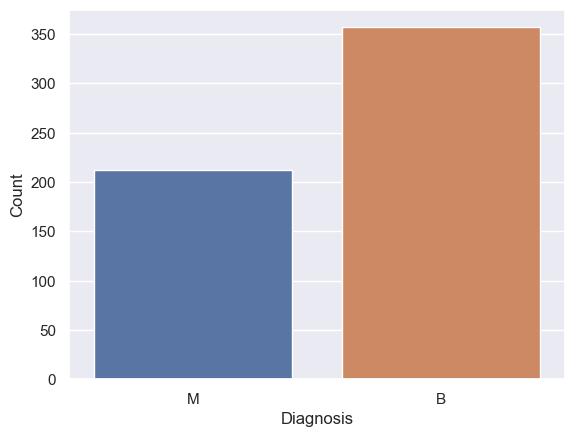

In [5]:
sns.countplot(x='diagnosis', data=df)
plt.ylabel('Count')
plt.xlabel("Diagnosis")
plt.show()

In the 'diagnosis' column, M means Malign and B, Benign. Let's change that to 0 and 1.

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis']) 

In [7]:
df.duplicated().sum()

0

There are no duplicates, so I'm not sure what that point refers to.

Now I'll divide the dataframe in train and test:

In [8]:
target = 'diagnosis'

x= df.drop(target, axis = 1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.70, test_size=0.30, random_state=1)

### Logistic Regression

In [9]:
LR = LogisticRegression(max_iter = 10000)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print(f"Accuracy Score for Logistic Regression: {np.round(accuracy_score(y_test, y_pred),2)}")

Accuracy Score for Logistic Regression: 0.63


### K Nearest Neighbors

In [10]:
neigh = KNeighborsClassifier(n_neighbors=2, weights = 'distance', p =1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(f"Accuracy Score for K Nearest Neighbors: {np.round(accuracy_score(y_test, y_pred),2)}")

Accuracy Score for K Nearest Neighbors: 0.85


### Random Forest

In [11]:
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(f"Accuracy Score for Random Forest: {np.round(accuracy_score(y_test, y_pred),2)}")

Accuracy Score for Random Forest: 0.93


### Support Vector Machines (SVM)

In [26]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print(f"Accuracy Score for SVC: {np.round(accuracy_score(y_test, y_pred),2)}")

Accuracy Score for SVC: 0.63


The best model is Random Forest!